In [11]:
import pandas as pd
import numpy as np

glass = pd.read_excel('glass.xlsx', sheet_name= 'glass')
glass


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [13]:
#EDA

glass.isnull().sum()


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [15]:
glass.describe()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [17]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


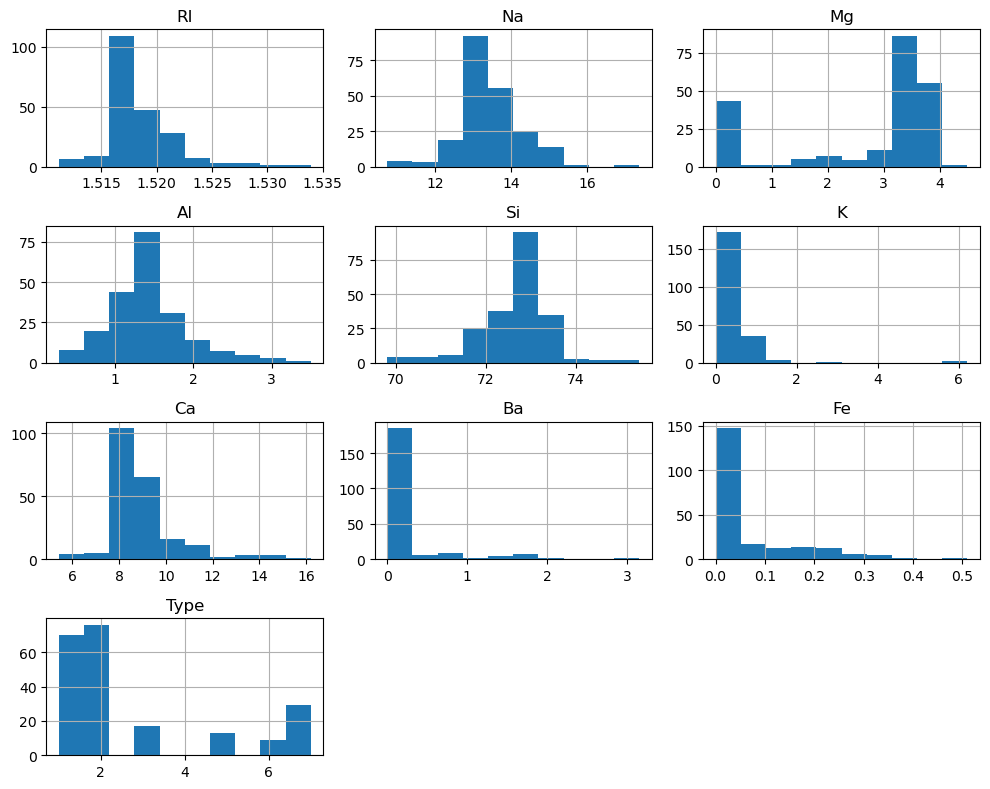

In [21]:
#Data Visualization
import matplotlib.pyplot as plt
# Plot histograms for each feature
glass.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


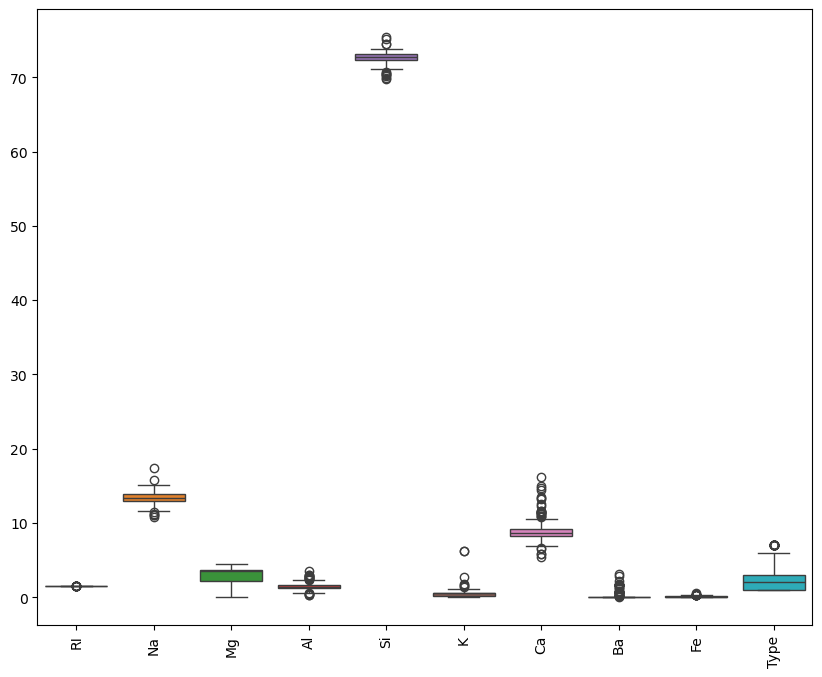

In [23]:
import seaborn as sns
# Boxplot for all features to check outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=glass)
plt.xticks(rotation=90)
plt.show()


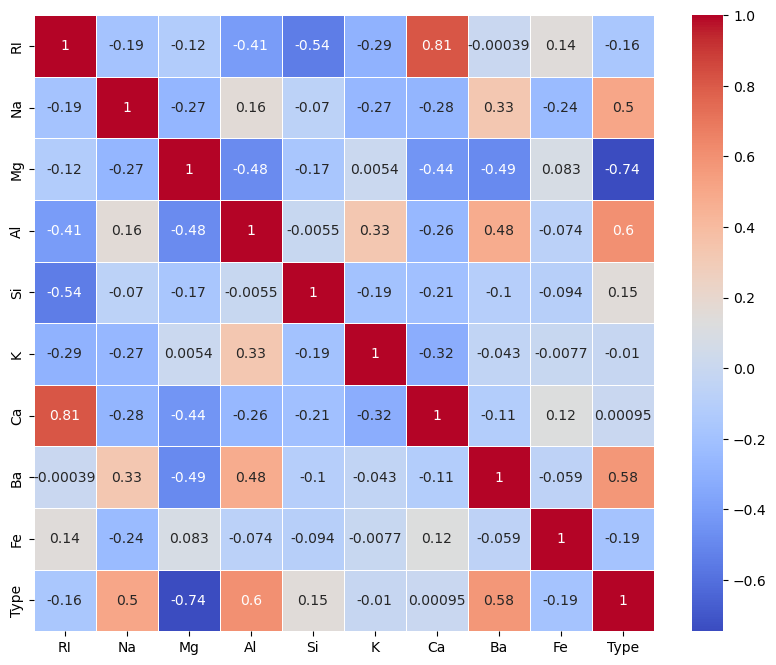

In [25]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(glass.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


In [29]:
#Data Processing

#Feature scaling

from sklearn.preprocessing import StandardScaler

# Standardization of features
scaler = StandardScaler()
X = glass.drop('Type', axis=1)  # Features
y = glass['Type']  # Target

X_scaled = scaler.fit_transform(X)


In [31]:
#Random Forest model implementation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
_
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [35]:
#Random Forest Classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf.predict(X_test)

# Performance Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7692307692307693
Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.89      0.81        19
           2       0.75      0.65      0.70        23
           3       0.67      0.50      0.57         4
           5       0.75      0.50      0.60         6
           6       0.75      1.00      0.86         3
           7       0.91      1.00      0.95        10

    accuracy                           0.77        65
   macro avg       0.76      0.76      0.75        65
weighted avg       0.77      0.77      0.76        65

Confusion Matrix:
 [[17  2  0  0  0  0]
 [ 4 15  1  1  1  1]
 [ 2  0  2  0  0  0]
 [ 0  3  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0 10]]


In [39]:
#Bagging and boosting methods
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

# Bagging with Random Forest
bagging_rf = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=100, random_state=42)
bagging_rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_bagging = bagging_rf.predict(X_test)

print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Bagging Classification Report:\n", classification_report(y_test, y_pred_bagging))



Bagging Accuracy: 0.7846153846153846
Bagging Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.89      0.77        19
           2       0.76      0.70      0.73        23
           3       1.00      0.50      0.67         4
           5       1.00      0.50      0.67         6
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00        10

    accuracy                           0.78        65
   macro avg       0.87      0.77      0.78        65
weighted avg       0.81      0.78      0.78        65



In [41]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_gb = gb.predict(X_test)

print("Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))


Boosting Accuracy: 0.8
Boosting Classification Report:
               precision    recall  f1-score   support

           1       0.72      0.95      0.82        19
           2       0.76      0.70      0.73        23
           3       1.00      0.75      0.86         4
           5       1.00      0.33      0.50         6
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00        10

    accuracy                           0.80        65
   macro avg       0.87      0.79      0.79        65
weighted avg       0.82      0.80      0.79        65



In [43]:
# Compare accuracy of Random Forest, Bagging, and Boosting
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Bagging Accuracy: {accuracy_score(y_test, y_pred_bagging)}")
print(f"Boosting Accuracy: {accuracy_score(y_test, y_pred_gb)}")


Random Forest Accuracy: 0.7692307692307693
Bagging Accuracy: 0.7846153846153846
Boosting Accuracy: 0.8


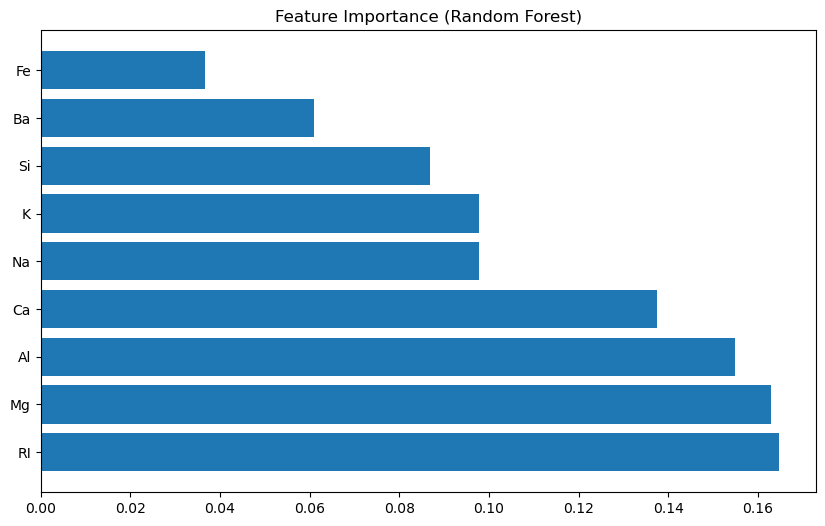

In [45]:
# Feature importance plot for Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [glass.columns[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), names)
plt.show()
